## Libraries

In [2]:
## Importing Data
import pandas as pd
import numpy as np

## EDA
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Feature Engineering and Model Preparation
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import time

## Models
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from xgboost import XGBClassifier
from sklearn import svm

## Evaluation
from sklearn.metrics import accuracy_score

## Model Deployment
import sys
import pickle
import os

## Importing Data

In [3]:
df = pd.read_csv("loan_lead_data.csv")

## Preview Data

In [4]:
df.head()

,Gender,Age,Employment Type,Credit Score,Source of Lead,Loan Period,Value of Collateral,Monthly Income,Bank Account Type,Existing EMI,Loan Amount,Estimated EMI,New Debt to Income ratio,Loan Approved
0,Male,64,Self Employed,637,Call,5,9398,136924,Savings,19786,85449,17390.031160,0.271509,0
1,Female,24,Salaried,469,Online,10,61140,104646,Savings,19124,343120,35422.447180,0.521247,0
2,Female,49,Salaried,678,Walk-in,10,135590,151255,Savings,13071,118681,12252.190061,0.167421,0
3,Female,53,Salaried,651,Walk-in,30,438668,34023,Savings,9113,352471,12841.190780,0.645275,0
4,Male,54,Salaried,709,Walk-in,10,260927,23957,Current,13760,150190,15505.063365,1.221566,0


In [5]:
df.columns

Index(['Gender', 'Age', 'Employment Type', 'Credit Score', 'Source of Lead',
       'Loan Period', 'Value of Collateral', 'Monthly Income',
       'Bank Account Type', 'Existing EMI', 'Loan Amount', 'Estimated EMI',
       'New Debt to Income ratio', 'Loan Approved'],
      dtype='object')

## Create Dummy Variables

In [6]:
non_numerical_columns = df.select_dtypes(exclude=['number']).columns.tolist()
print(non_numerical_columns)

['Gender', 'Employment Type', 'Source of Lead', 'Bank Account Type']


In [7]:
dummy_df = pd.get_dummies(df, prefix=non_numerical_columns)

In [8]:
dummy_df

,Age,Credit Score,Loan Period,Value of Collateral,Monthly Income,Existing EMI,Loan Amount,Estimated EMI,New Debt to Income ratio,Loan Approved,...,Gender_Others,Employment Type_Business,Employment Type_Salaried,Employment Type_Self Employed,Source of Lead_Call,Source of Lead_Email,Source of Lead_Online,Source of Lead_Walk-in,Bank Account Type_Current,Bank Account Type_Savings
0,64,637,5,9398,136924,19786,85449,17390.031160,0.271509,0,...,0,0,0,1,1,0,0,0,0,1
1,24,469,10,61140,104646,19124,343120,35422.447180,0.521247,0,...,0,0,1,0,0,0,1,0,0,1
2,49,678,10,135590,151255,13071,118681,12252.190061,0.167421,0,...,0,0,1,0,0,0,0,1,0,1
3,53,651,30,438668,34023,9113,352471,12841.190780,0.645275,0,...,0,0,1,0,0,0,0,1,0,1
4,54,709,10,260927,23957,13760,150190,15505.063365,1.221566,0,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,67,848,10,148261,91031,19158,36935,3813.033593,0.252343,0,...,0,0,1,0,0,0,0,1,0,1
4996,65,619,1,222489,188441,4404,46102,46370.928333,0.269447,0,...,0,0,1,0,0,0,0,1,0,1
4997,51,540,1,305298,107664,18578,457509,460177.802500,4.446758,0,...,0,0,0,1,0,0,0,1,0,1
4998,24,649,10,367683,143600,8769,29729,3069.112649,0.082438,1,...,0,0,1,0,0,0,1,0,0,1


## Train/Test Split

In [9]:
X = dummy_df.loc[:, dummy_df.columns != 'Loan Approved']
y = dummy_df['Loan Approved']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

## Addressing Class Imbalance

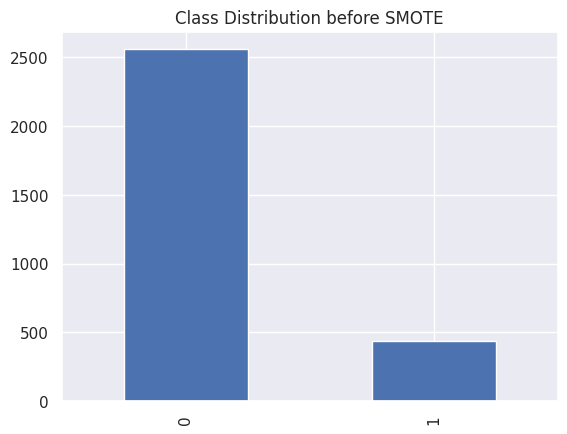

In [11]:
y_train.value_counts().plot(kind='bar', title='Class Distribution before SMOTE')
plt.show()

In [12]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

<AxesSubplot:title={'center':'Class Distribution after SMOTE'}>

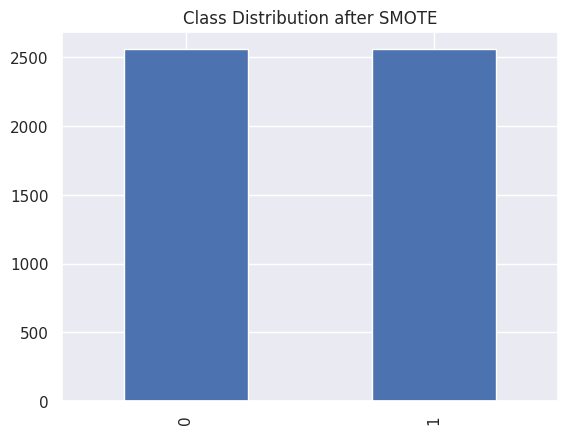

In [13]:
y_train_smote.value_counts().plot(kind='bar', title='Class Distribution after SMOTE')

## Logisitc Regression

In [14]:
start_time = time.time()
log_reg_model = LogisticRegression(max_iter=1000).fit(X_train_smote, y_train_smote)
logreg_train_time = time.time() - start_time
print("Model Training Time (in seconds): ",logreg_train_time)

Model Training Time (in seconds):  1.6198225021362305


In [15]:
start_time = time.time()
y_pred = log_reg_model.predict(X_test)
model_accuracy = accuracy_score(y_test, y_pred)
logreg_pred_time = time.time() - start_time
print("Model Accuracy: ",model_accuracy)
print("Model Inference Time (in seconds): ",logreg_pred_time)

Model Accuracy:  0.8325
Model Inference Time (in seconds):  0.09407997131347656


## Decision Tree

In [16]:
start_time = time.time()
dtc = tree.DecisionTreeClassifier(random_state=42)
dtc_model = dtc.fit(X_train_smote, y_train_smote)
dtc_train_time = time.time() - start_time
print("Model Training Time (in seconds): ",dtc_train_time)

Model Training Time (in seconds):  0.14240407943725586


In [17]:
start_time = time.time()
y_pred = dtc_model.predict(X_test)
model_accuracy = accuracy_score(y_test, y_pred)
dtc_pred_time = time.time() - start_time
print("Model Accuracy: ",model_accuracy)
print("Model Inference Time (in seconds): ",logreg_pred_time)

Model Accuracy:  0.953
Model Inference Time (in seconds):  0.09407997131347656


## XGBoost Classifier

In [18]:
start_time = time.time()
xgb_cl = XGBClassifier(
    n_estimators=50,
    learning_rate=0.1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss')

xgb_model = xgb_cl.fit(X_train_smote, y_train_smote)
xgb_train_time = time.time() - start_time
print("Model Training Time (in seconds): ",xgb_train_time)

Model Training Time (in seconds):  0.855039119720459


In [19]:
start_time = time.time()
y_pred = xgb_model.predict(X_test)
model_accuracy = accuracy_score(y_test, y_pred)
xgb_model_pred_time = time.time() - start_time
print("Model Accuracy: ",model_accuracy)
print("Model Inference Time (in seconds): ",xgb_model_pred_time)

Model Accuracy:  0.972
Model Inference Time (in seconds):  0.010216236114501953


## SVM Classifier

In [20]:
start_time = time.time()
svm_cl = svm.SVC(random_state = 42)

svm_model = svm_cl.fit(X_train_smote, y_train_smote)
svm_train_time = time.time() - start_time
print("Model Training Time (in seconds): ",xgb_train_time)

Model Training Time (in seconds):  0.855039119720459


In [21]:
start_time = time.time()
y_pred = svm_model.predict(X_test)
model_accuracy = accuracy_score(y_test, y_pred)
svm_model_pred_time = time.time() - start_time
print("Model Accuracy: ",model_accuracy)
print("Model Inference Time (in seconds): ",svm_model_pred_time)

Model Accuracy:  0.8505
Model Inference Time (in seconds):  0.33590078353881836


## Model Evaluation: Storage Space

In [29]:
logreg_stream = pickle.dumps(log_reg_model)
logreg_size = sys.getsizeof(logreg_stream)

dtree_stream = pickle.dumps(dtc_model)
dtree_size = sys.getsizeof(dtree_stream)

xgb_model_stream = pickle.dumps(xgb_model)
xgb_model_size = sys.getsizeof(xgb_model_stream)

svm_model_stream = pickle.dumps(svm_model)
svm_model_size = sys.getsizeof(svm_model_stream)

## Sizes of models (in kilobytes)
print("LogReg model size (in kilobytes): ",round(logreg_size/1024,2))
print("Decision Tree model size (in kilobytes): ",round(dtree_size/1024,2))
print("XGBoost model size (in kilobytes): ",round(xgb_model_size/1024,2))
print("SVM model size (in kilobytes): ",round(svm_model_size/1024,2))

LogReg model size (in kilobytes):  1.39
Decision Tree model size (in kilobytes):  15.7
XGBoost model size (in kilobytes):  135.83
SVM model size (in kilobytes):  287.42


## Identify Top Two Predictor Variables for Each Model

#### Logistic Regression

In [23]:
Coef_df = pd.DataFrame({
    "Feature_Names":list(log_reg_model.feature_names_in_),
    "Coefs":list(log_reg_model.coef_[0])
})

Coef_df['Coefs_abs_value'] = Coef_df['Coefs'].abs()
Coef_df.sort_values(by=['Coefs_abs_value'],ascending=False)[:2]

,Feature_Names,Coefs,Coefs_abs_value
0,Age,-0.092372,0.092372
2,Loan Period,-0.029301,0.029301


#### Decision Tree

In [24]:
top_2_dtree_features = X.columns[dtc_model.feature_importances_.argsort()[-2:][::-1]]
top_2_dtree_features

Index(['New Debt to Income ratio', 'Value of Collateral'], dtype='object')

#### XGBoost

In [25]:
top_2_xgboost_features = X.columns[xgb_model.feature_importances_.argsort()[-2:][::-1]]
top_2_xgboost_features

Index(['New Debt to Income ratio', 'Value of Collateral'], dtype='object')